# Cost Function Notebook
# replicates Deeplearning.ai Optional Lab: Cost Function


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Generate synthetic data
# Example: apartment sizes (in m²) vs price (in €10k)

Cost at θ0=0, θ1=0 → 14743.0


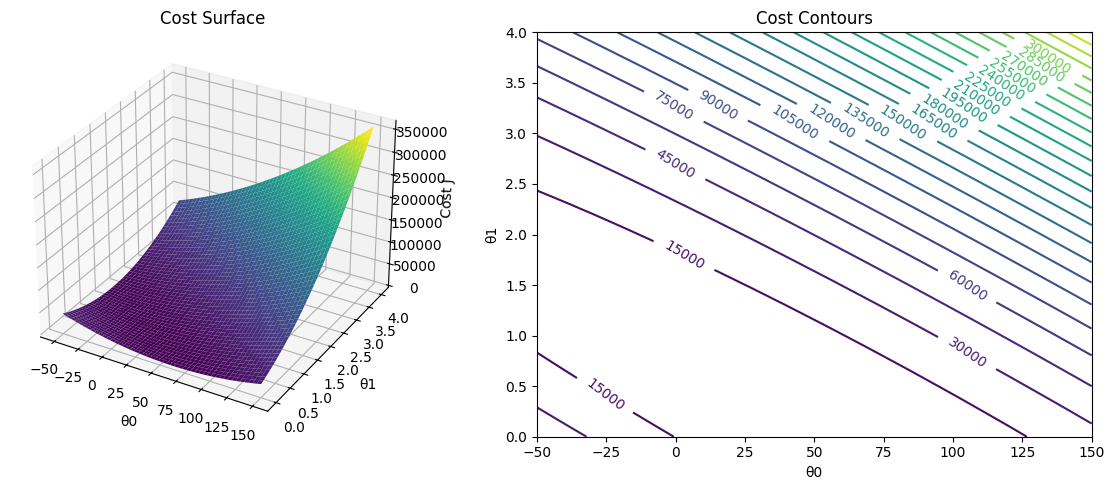

C:\Users\vansh\AppData\Local\Temp\ipykernel_1332\671300896.py:21: RuntimeWarning: overflow encountered in square
  return np.sum((preds - y)**2) / (2 * len(x))
C:\Users\vansh\AppData\Roaming\Python\Python313\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\vansh\AppData\Local\Temp\ipykernel_1332\671300896.py:53: RuntimeWarning: overflow encountered in multiply
  d1 = np.sum((preds - y) * x.flatten()) / m
C:\Users\vansh\AppData\Local\Temp\ipykernel_1332\671300896.py:54: RuntimeWarning: invalid value encountered in scalar subtract
  theta0 -= alpha * d0
C:\Users\vansh\AppData\Local\Temp\ipykernel_1332\671300896.py:55: RuntimeWarning: invalid value encountered in scalar subtract
  theta1 -= alpha * d1


Final θ0, θ1: nan, nan
Minimal cost: nan


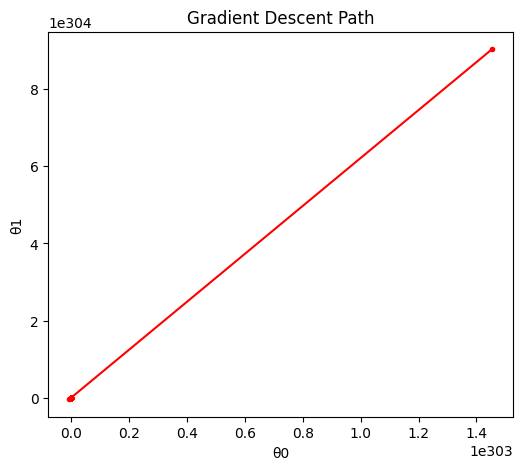

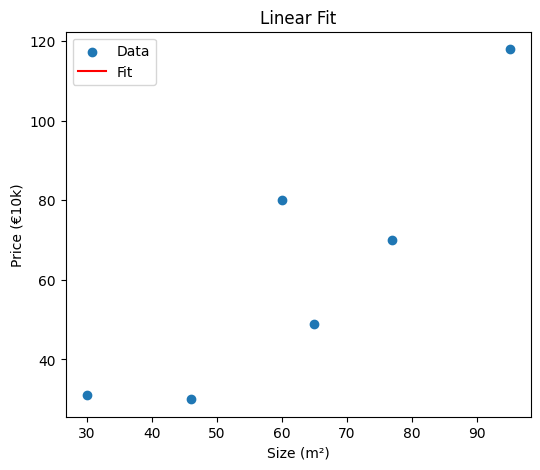

In [3]:
# Cost Function Notebook
# replicates Deeplearning.ai Optional Lab: Cost Function

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Generate synthetic data
# Example: apartment sizes (in m²) vs price (in €10k)
x = np.array([[30], [46], [60], [65], [77], [95]])
y = np.array([31, 30, 80, 49, 70, 118])
m = len(x)

# 2. Hypothesis function: h(x) = θ0 + θ1 * x
def predict(theta0, theta1, x):
    return theta0 + theta1 * x

# 3. Cost function: J(θ0, θ1) = (1/2m) ∑(h(x)‑y)²
def compute_cost(theta0, theta1, x, y):
    preds = predict(theta0, theta1, x)
    return np.sum((preds - y)**2) / (2 * len(x))

# Quick sanity check
print("Cost at θ0=0, θ1=0 →", compute_cost(0,0,x,y))

# 4. Visualize cost surface
theta0_vals = np.linspace(-50, 150, 50)
theta1_vals = np.linspace(0, 4, 50)
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
J_vals = np.array([[compute_cost(t0, t1, x, y) for t0 in theta0_vals] for t1 in theta1_vals])

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(T0, T1, J_vals, cmap='viridis', edgecolor='none')
ax.set_xlabel('θ0'); ax.set_ylabel('θ1'); ax.set_zlabel('Cost J')
ax.set_title("Cost Surface")

ax2 = fig.add_subplot(122)
cs = ax2.contour(T0, T1, J_vals, levels=30)
ax2.clabel(cs, inline=True)
ax2.set_xlabel('θ0'); ax2.set_ylabel('θ1')
ax2.set_title("Cost Contours")
plt.tight_layout()
plt.show()

# 5. Gradient Descent implementation
def gradient_descent(x, y, theta0, theta1, alpha, num_iters):
    m = len(x)
    history = [(theta0, theta1, compute_cost(theta0, theta1, x, y))]
    for i in range(num_iters):
        preds = predict(theta0, theta1, x)
        d0 = np.sum(preds - y) / m
        d1 = np.sum((preds - y) * x.flatten()) / m
        theta0 -= alpha * d0
        theta1 -= alpha * d1
        history.append((theta0, theta1, compute_cost(theta0, theta1, x, y)))
    return theta0, theta1, history

theta0_a, theta1_a, hist = gradient_descent(x, y, theta0=0, theta1=0, alpha=0.01, num_iters=1000)
print(f"Final θ0, θ1: {theta0_a:.2f}, {theta1_a:.2f}")
print(f"Minimal cost: {hist[-1][2]:.2f}")

# 6. Plot gradient descent path over cost contours
thetas0 = [h[0] for h in hist]
thetas1 = [h[1] for h in hist]

plt.figure(figsize=(6,5))
plt.contour(T0, T1, J_vals, levels=30, cmap='viridis')
plt.plot(thetas0, thetas1, 'r-o', markersize=3)
plt.xlabel('θ0'); plt.ylabel('θ1')
plt.title("Gradient Descent Path")
plt.show()

# 7. Plot fitted line over data
plt.figure(figsize=(6,5))
plt.scatter(x, y, label="Data")
plt.plot(x, predict(theta0_a, theta1_a, x), 'r-', label="Fit")
plt.xlabel("Size (m²)")
plt.ylabel("Price (€10k)")
plt.title("Linear Fit")
plt.legend()
plt.show()
